In [31]:
# import required libraries
import pandas as pd
import numpy as np

import sklearn as scikit
import matplotlib.pyplot as pyplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# read in csv 

df = pd.read_csv('data/inputs/US Carbon Emissions by State/CO2_Emissions_US.csv')

print(df)

       year state-name                                      sector-name  \
0      1970    Alabama              Industrial carbon dioxide emissions   
1      1970    Alabama              Industrial carbon dioxide emissions   
2      1970    Alabama              Industrial carbon dioxide emissions   
3      1970    Alabama              Industrial carbon dioxide emissions   
4      1970    Alabama  Total carbon dioxide emissions from all sectors   
...     ...        ...                                              ...   
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name       value  
0             Coal   26.721507  
1        Petroleum    3.577779  


In [4]:
# read in csv 

df2 = pd.read_csv('data/inputs/Shopping Trends/shopping_trends.csv')

print(df2)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [11]:
# join data sets

combined_df = df.merge(df2, left_on='state-name', right_on='Location')

print(combined_df)

         year state-name                                      sector-name  \
0        1970    Alabama              Industrial carbon dioxide emissions   
1        1970    Alabama              Industrial carbon dioxide emissions   
2        1970    Alabama              Industrial carbon dioxide emissions   
3        1970    Alabama              Industrial carbon dioxide emissions   
4        1970    Alabama              Industrial carbon dioxide emissions   
...       ...        ...                                              ...   
4507312  2021    Wyoming  Total carbon dioxide emissions from all sectors   
4507313  2021    Wyoming  Total carbon dioxide emissions from all sectors   
4507314  2021    Wyoming  Total carbon dioxide emissions from all sectors   
4507315  2021    Wyoming  Total carbon dioxide emissions from all sectors   
4507316  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name      value  Customer ID  Age  Gender Item Purchased  \
0

In [26]:
# set values for dependent and independent variables

dep_var_1 = combined_df["value"][:200]
ind_var_1 = combined_df["Purchase Amount (USD)"][:200]
ind_var_2 = combined_df["Review Rating"][:200]
ind_var_3 = combined_df["Age"][:200]

print(dep_var_1)
print(ind_var_1)
print(ind_var_2)
print(ind_var_3)

0      26.721507
1      26.721507
2      26.721507
3      26.721507
4      26.721507
         ...    
195     8.944097
196     8.944097
197     8.944097
198     8.944097
199     8.944097
Name: value, Length: 200, dtype: float64
0      36
1      83
2      29
3      85
4      96
       ..
195    60
196    72
197    35
198    24
199    90
Name: Purchase Amount (USD), Length: 200, dtype: int64
0      4.1
1      4.8
2      4.2
3      2.6
4      2.8
      ... 
195    5.0
196    3.2
197    3.8
198    4.2
199    4.9
Name: Review Rating, Length: 200, dtype: float64
0      25
1      65
2      22
3      58
4      38
       ..
195    49
196    31
197    24
198    42
199    49
Name: Age, Length: 200, dtype: int64


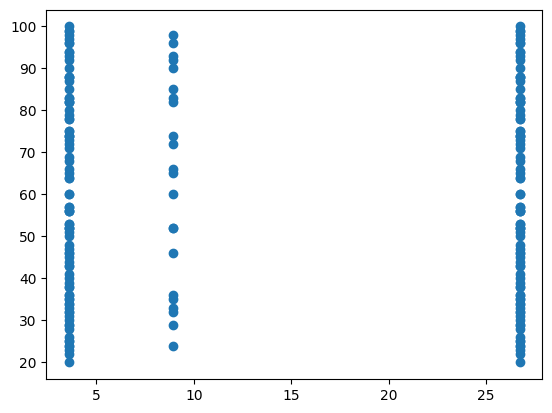

In [27]:
# visualize relationship between Kilotons of CO2 and Purchase Amount (USD)

pygraph_1 = pyplot.scatter(dep_var_1, ind_var_1)

pygraph_1

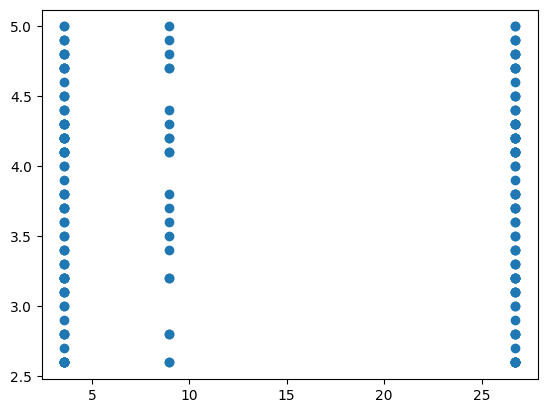

In [28]:
# visualize relationship between Kilotons of CO2 and Review Rating

pygraph_2 = pyplot.scatter(dep_var_1, ind_var_2)

pygraph_2

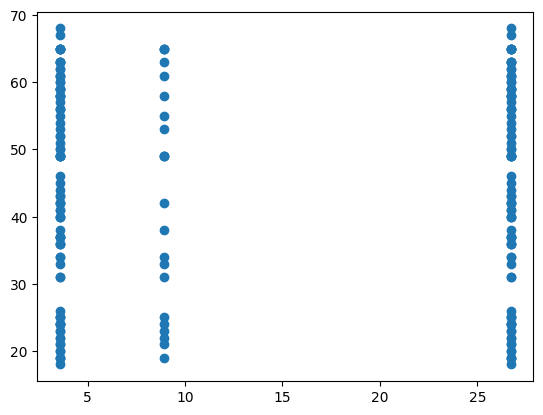

In [29]:
# visualize relationship between Kilotons of CO2 and Review Rating

pygraph_3 = pyplot.scatter(dep_var_1, ind_var_3)

pygraph_3

In [32]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(dep_var_1, ind_var_1, test_size=0.1, random_state= 10)

print(x_train_1) 
print(y_train_1)

170     3.577779
182     8.944097
59     26.721507
185     8.944097
12     26.721507
         ...    
73     26.721507
144     3.577779
118     3.577779
189     8.944097
99      3.577779
Name: value, Length: 140, dtype: float64
170    60
182    96
59     47
185    92
12     65
       ..
73     57
144    35
118    79
189    32
99     98
Name: Purchase Amount (USD), Length: 140, dtype: int64


In [33]:
# compute linear regression

linear_regression = LinearRegression()

x = np.array(x_train_1, dtype=np.float64)
y = np.array(y_train_1, dtype=np.float64)

lr = linear_regression.fit(x.reshape(-1, 1), y)

print(lr)

# compute regression line

regression = lr.predict(x.reshape(-1,1))

print(regression)

LinearRegression()
[59.76879221 59.47490908 58.50134004 59.47490908 58.50134004 58.50134004
 59.76879221 59.76879221 58.50134004 58.50134004 58.50134004 59.76879221
 58.50134004 59.76879221 59.76879221 59.76879221 58.50134004 59.76879221
 58.50134004 59.76879221 59.47490908 59.76879221 58.50134004 59.76879221
 58.50134004 59.76879221 58.50134004 58.50134004 59.76879221 59.47490908
 58.50134004 59.76879221 59.47490908 59.47490908 58.50134004 59.76879221
 59.76879221 58.50134004 58.50134004 58.50134004 58.50134004 58.50134004
 58.50134004 59.76879221 59.76879221 58.50134004 58.50134004 59.76879221
 58.50134004 59.76879221 58.50134004 58.50134004 58.50134004 59.76879221
 59.76879221 58.50134004 59.76879221 58.50134004 59.47490908 59.76879221
 59.47490908 58.50134004 59.76879221 59.47490908 59.47490908 59.76879221
 59.76879221 58.50134004 59.76879221 58.50134004 58.50134004 59.47490908
 59.47490908 59.76879221 58.50134004 59.47490908 58.50134004 59.76879221
 58.50134004 59.76879221 58.5013

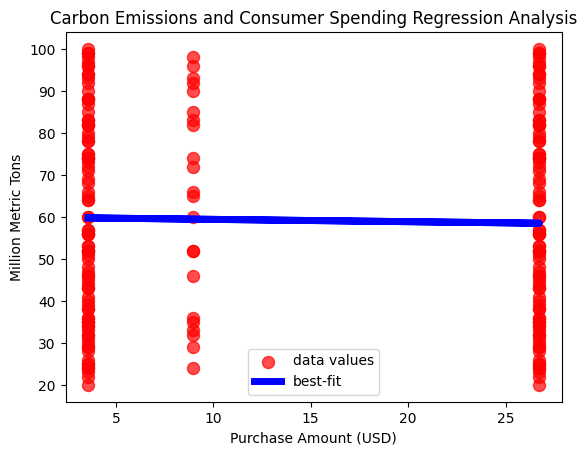

In [35]:
# visualize regression line

pyplot.scatter(dep_var_1, ind_var_1, label='data values', alpha=0.7, color='red', s=75)
pyplot.plot(x, regression, label='best-fit', color='blue', linewidth=5)
pyplot.title('Carbon Emissions and Consumer Spending Regression Analysis')
pyplot.xlabel('Purchase Amount (USD)')
pyplot.ylabel('Million Metric Tons')
pyplot.legend()
pyplot.show()
